In [1]:
# import required libraries
import pandas as pd
from PIL import Image
import time
import warnings
warnings.filterwarnings('ignore') 

In [2]:
image_path = r"C:\Users\sss\Desktop\mnist.zip"

In [3]:
# extracting the zip file
from zipfile import ZipFile
with ZipFile(image_path, 'r') as zipObj:
#Extract all the contents of zip file in current directory
     zipObj.extractall(r'C:\Users\sss\Desktop\mnist') 

In [4]:
import os
import pandas as pd
import numpy as np
from PIL import Image

def load_mnist_data(data_folder):
    data = []
    labels = []

    for root, _, files in os.walk(data_folder):
        for file in files:
            if file.endswith(".png"):
                image_path = os.path.join(root, file)
                try:
                    with Image.open(image_path) as image:
                        # Convert the image to grayscale and then to a numpy array
                        img_array = np.array(image.convert('L'), dtype='uint8')
                        # Check if the image has non-zero pixel values
                        if np.any(img_array != 0):
                            data.append(img_array.ravel())  # Flatten the image using ravel()
                            label = os.path.basename(os.path.dirname(image_path))
                            labels.append(label)
                except Exception as e:
                    print(f"Error processing image {image_path}: {e}")

    return data, labels

data, labels = load_mnist_data(r'C:\Users\sss\Desktop\mnist')

# Convert the list of pixel arrays to a numpy array
data_array = np.array(data)

# Round the float values in the numpy array to the nearest integer
data_array = np.round(data_array)

# Create a new dataframe with columns based on the number of pixels in the flattened image
pixels_df = pd.DataFrame(data_array, columns=[f'pixel_{i}' for i in range(len(data_array[0]))])

# Create the final dataframe with the 'Label' column
mnist_df = pd.concat([pixels_df, pd.Series(labels, name='Label')], axis=1)

# Display the vectorized image dataframe
print(mnist_df.head())


   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel_8  pixel_9  ...  pixel_775  pixel_776  pixel_777  pixel_778  \
0        0        0  ...          0          0          0          0   
1        0        0  ...          0          0          0          0   
2        0        0  ...          0          0          0          0   
3        0        0  ...          0          0          0          0   
4        0        0  ...          0          0          0          0   

   pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  Label  
0          0          0          0    

In [5]:
# converting extracted file to csv
#mnist_df.to_csv("CV_DATA.csv",index=False) 

In [2]:
# coverting the csv file to Dataframe
df = pd.read_csv(r"C:/Users/sss/Desktop/CV_DATA.csv") 

In [3]:
df.head() 

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


In [4]:
# getting the shape of the dataframe
df.shape

(372451, 785)

In [5]:
# getting value counts of Label
df.Label.value_counts()

Label
O    57825
S    48419
U    29008
C    23409
T    22495
P    19341
N    19010
A    13870
M    12336
L    11586
R    11566
E    11440
Y    10859
W    10784
D    10134
B     8668
J     8493
H     7218
X     6272
Z     6076
Q     5812
G     5762
K     5603
V     4182
F     1163
I     1120
Name: count, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

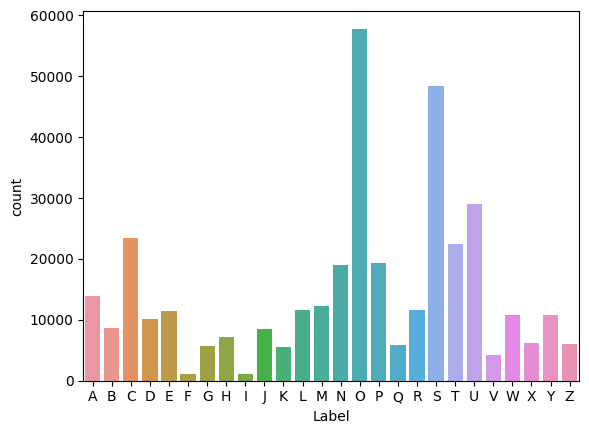

In [6]:
# countplot for Label column
import seaborn as sns 
sns.countplot(data=df, x='Label')

## Seperating input and output

In [7]:
#input variables
X = df.drop('Label', axis=1)
#output variable
y = df['Label'] 

In [8]:
X.head() 

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y.head() 

0    A
1    A
2    A
3    A
4    A
Name: Label, dtype: object

In [10]:
import numpy as np 
idx = np.random.randint(0, 372450, 9)

print(idx) 

[268872 102635 364590  12213 206920 351030 324001 187741  70150]


In [11]:
idx[4] 

206920

In [12]:
y[idx[4]] 

'P'

In [13]:
print(y[idx[4]])

print(np.reshape(X.values[idx[4]], (28,28)))

img = np.reshape(X.values[idx[4]], (28,28))

P
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 135 234 255 255 255 255 255 255 242 204 151  98
   44   4   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 198 255 209 167 156 156 156 156 182 223 241 248
  247 191  75   4   0   0   0   0   0   0]
 [  0   0   0   0   0   0 198 255  91   7   0   0   0   0   0   0   9  48
  142 244 220  94   0   0   0   0   0   0]
 [  0   0   0   0   0   0 138 235 122  22   0   0   0   0   0   0   0   0
    6  89 250 184   0   0   0   0   0   0]
 [  0   0   0   0   0   0  66 211 164  42   0   0   0   0   0 

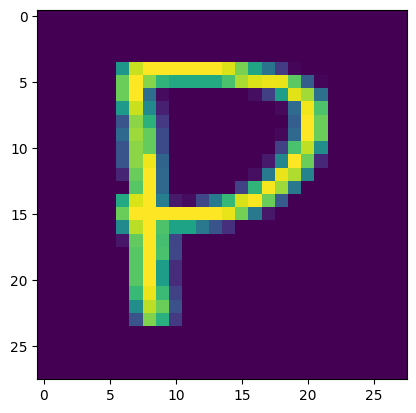

In [14]:
import matplotlib.pyplot as plt 
plt.imshow(img) 

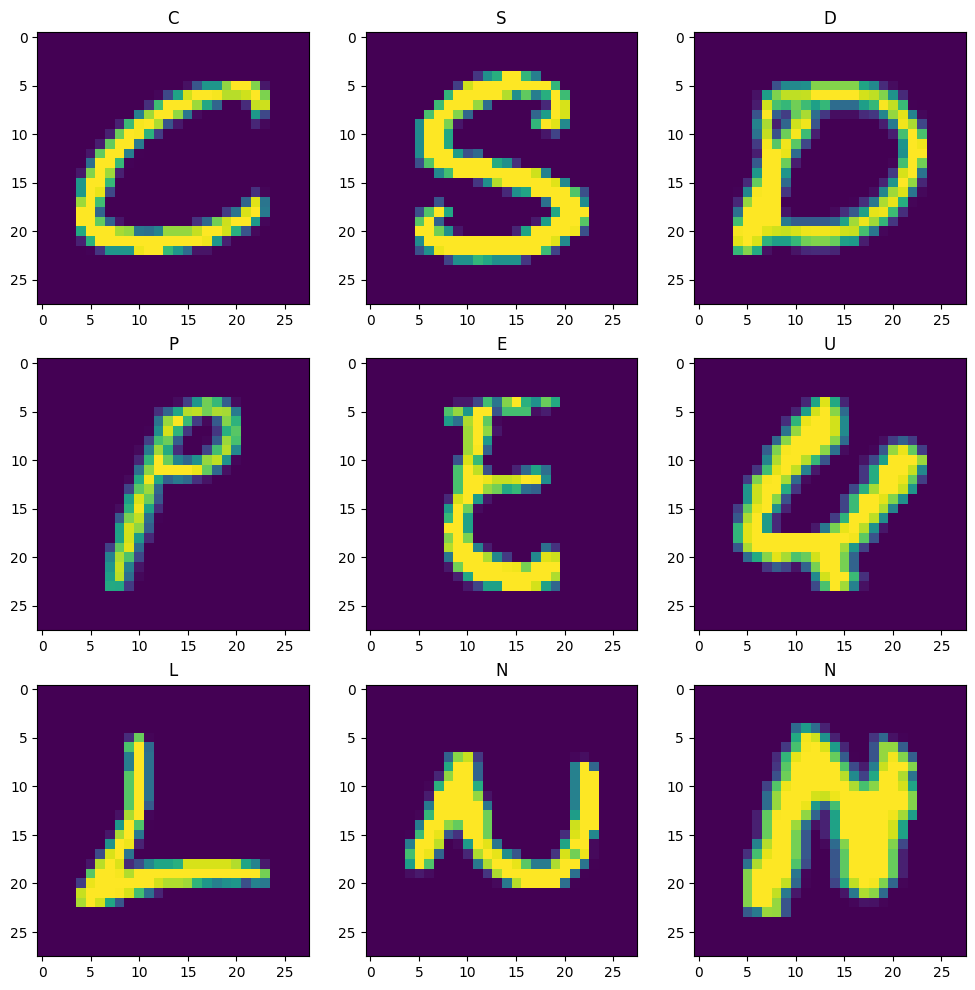

In [15]:
plt.figure(figsize=(12, 12))
idx = np.random.randint(0, 372450, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y[idx[i]])
    img_grid = np.reshape(X.values[idx[i]], (28,28))
    plt.imshow(img_grid) 

## Split the data to train and test

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 

In [17]:
X_train.shape

(279338, 784)

In [18]:
X_test.shape  

(93113, 784)

## Model Training & Evaluation

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
Logistic_Model = LogisticRegression()
Logistic_Model.fit(X_train, y_train)  

LogisticRegression()

In [20]:
# Capture the start time
start_time = time.time()
# prediction
y_test_pred = Logistic_Model.predict(X_test)
# Capture the end time
end_time = time.time()

# Calculate the prediction time
prediction_time = end_time - start_time

print(f"Prediction time: {prediction_time:.6f} seconds") 

Prediction time: 1.843075 seconds


In [21]:
import sys 
Logistic_Model = sys.getsizeof(Logistic_Model) 
print("The size of the Logistic Model is: ",Logistic_Model,"Bytes") 

The size of the Logistic Model is:  48 Bytes


In [22]:
from sklearn.metrics import accuracy_score 
Logistic_Model_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy of logistic regression classifier model is: ",Logistic_Model_accuracy) 

Accuracy of logistic regression classifier model is:  0.8764511937108674


## Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

Decision_Tree_Model = DecisionTreeClassifier()
Decision_Tree_Model.fit(X_train, y_train) 

DecisionTreeClassifier()

In [24]:
# Capture the start time
start_time = time.time()
# prediction
y_test_pred = Decision_Tree_Model.predict(X_test)
# Capture the end time
end_time = time.time()

# Calculate the prediction time
prediction_time = end_time - start_time

print(f"Prediction time: {prediction_time:.6f} seconds") 

Prediction time: 0.476845 seconds


In [25]:
Decision_classification_size = sys.getsizeof(Decision_Tree_Model)
print("The size of the DecisionTree classification is: ",Decision_classification_size,"Bytes")

The size of the DecisionTree classification is:  48 Bytes


In [26]:
Decision_classification_accuracy=accuracy_score(y_test, y_test_pred)
print("Accuracy of decision tree classifier model is: ",Decision_classification_accuracy)  

Accuracy of decision tree classifier model is:  0.9478483133397055


## Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
RandomForest_Model =RandomForestClassifier()
RandomForest_Model.fit(X_train, y_train)  

RandomForestClassifier()

In [28]:
# Capture the start time
start_time = time.time()
# prediction
y_test_pred = RandomForest_Model.predict(X_test) 
# Capture the end time
end_time = time.time()

# Calculate the prediction time
prediction_time = end_time - start_time

print(f"Prediction time: {prediction_time:.6f} seconds")

Prediction time: 9.006455 seconds


In [29]:
RandomForest_classifier_size = sys.getsizeof(RandomForest_Model)
print("The size of the rf_classifier is: ",RandomForest_classifier_size,"Bytes") 

The size of the rf_classifier is:  48 Bytes


In [30]:
RandomForest_classifier_accuracy=accuracy_score(y_test, y_test_pred)
print("Accuracy of random forest classifier model is: ",RandomForest_classifier_accuracy) 

Accuracy of random forest classifier model is:  0.986221043248526


## KNN Model

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn_Model=KNeighborsClassifier()
knn_Model.fit(X_train,y_train) 

KNeighborsClassifier()

In [32]:
# Capture the start time
start_time = time.time()

#prediction
y_test_pred = knn_Model.predict(X_test) 

# Capture the end time
end_time = time.time()

# Calculate the prediction time
prediction_time = end_time - start_time

print(f"Prediction time: {prediction_time:.6f} seconds")

Prediction time: 2057.996789 seconds


In [33]:
knn_classifier_size = sys.getsizeof(knn_Model)
print("The size of the rf_classifier is: ",RandomForest_classifier_size,"Bytes")

The size of the rf_classifier is:  48 Bytes


In [34]:
knn_classifier_accuracy=accuracy_score(y_test, y_test_pred)
print("Accuracy of KNN classifier model is: ",knn_classifier_accuracy)

Accuracy of KNN classifier model is:  0.9586953486623779


In [35]:
models = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [knn_classifier_accuracy,Logistic_Model_accuracy,Decision_classification_accuracy,RandomForest_classifier_accuracy]
data = {'Model Name': models, 'Accuracy': accuracies}
model_df = pd.DataFrame(data)

# Multiply the accuracies by 100
model_df['Accuracy'] = model_df['Accuracy'] * 100
model_df.head()

,Model Name,Accuracy
0,KNN,95.869535
1,Logistic Regression,87.645119
2,Decision Tree,94.784831
3,Random Forest,98.622104


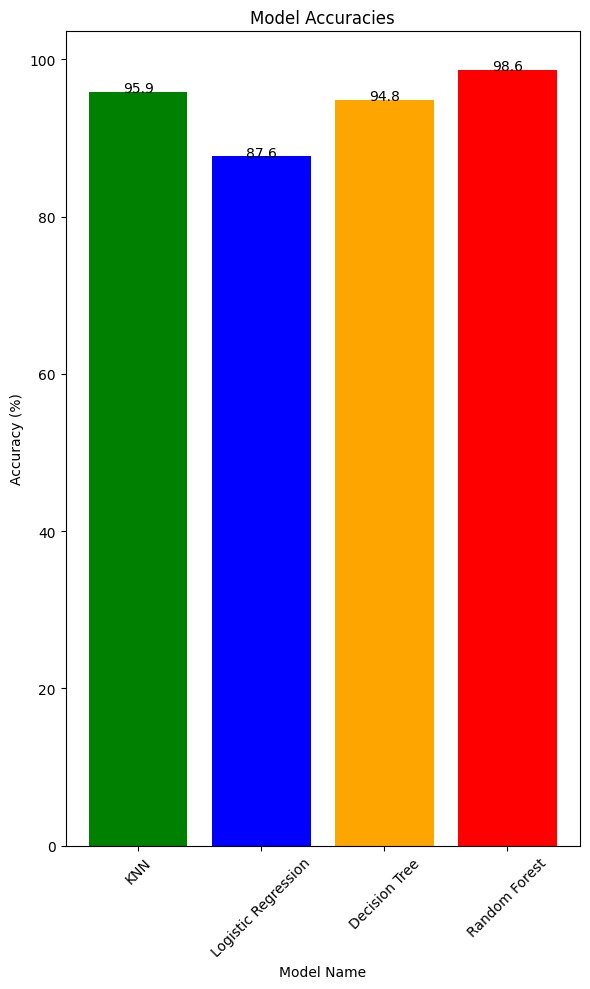

In [37]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'model_df' with columns 'Model Name' and 'Accuracy'

# Create the bar plot
plt.figure(figsize=(6, 10))  # Adjust the figure size to accommodate the vertical bars
bars = plt.bar(model_df['Model Name'], model_df['Accuracy'], color=['green', 'blue', 'orange', 'red'])
plt.xlabel('Model Name')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies')

for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
                   f'{height:.1f}', ha='center', va='center', color='black')

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

### Loading models for API using pickle Library

In [38]:
import pickle 
pickle.dump(Logistic_Model,open("Logistic_Model.sav",'wb'))
pickle.dump(Decision_Tree_Model,open("Decision_Tree_Model.sav",'wb'))
pickle.dump(RandomForest_Model,open("RandomForest_Model.sav",'wb'))
pickle.dump(knn_Model,open("knn_Model.sav",'wb')) 

## checking the models if the model are working properly or not by taking small amount of data

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

subset_size = 20000
# Load MNIST data from CSV file
df = pd.read_csv(r"C:/Users/sss/Desktop/CV_DATA.csv",nrows=subset_size)

df 

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B


In [52]:
print(df['Label'].value_counts())

Label
A    13870
B     6130
Name: count, dtype: int64


### Logistic regression

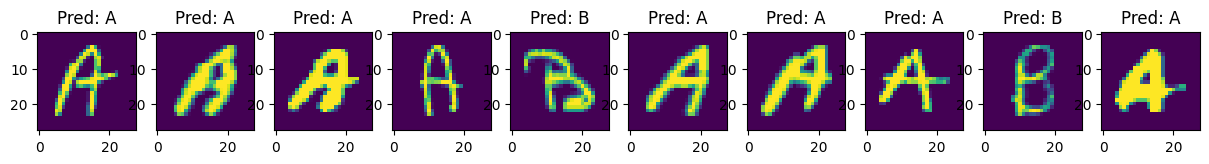

In [59]:
# Convert pixel values to integers and labels to alphabets (A to Z)
X = df.drop('Label', axis=1).values.astype('int')
y = df['Label'].values

# Encode alphabet labels to integers using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
classifier = LogisticRegression(max_iter=1000)  # You can adjust max_iter depending on convergence
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Convert back the encoded labels to original alphabet labels
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Visualize a sample of test images with their predicted labels
num_samples = 10
fig, axs = plt.subplots(1, num_samples, figsize=(15, 2))

for i in range(num_samples):
    img = X_test[i].reshape(28, 28)  # Resize the image to its original dimensions for visualization
    axs[i].imshow(img, cmap='viridis')
    axs[i].set_title(f"Pred: {y_pred_labels[i]}")

plt.show()


### Decision Tree classifier

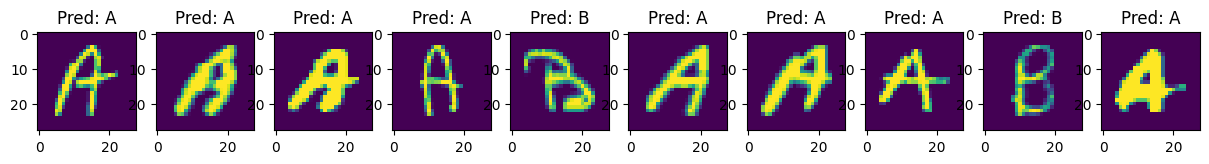

In [60]:
from sklearn.tree import DecisionTreeClassifier
# Initialize and train the Logistic Regression model
Decision_Tree_Model = DecisionTreeClassifier()
Decision_Tree_Model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = Decision_Tree_Model.predict(X_test)

# Convert back the encoded labels to original alphabet labels
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Visualize a sample of test images with their predicted labels
num_samples = 10
fig, axs = plt.subplots(1, num_samples, figsize=(15, 2))

for i in range(num_samples):
    img = X_test[i].reshape(28, 28)  # Resize the image to its original dimensions for visualization
    axs[i].imshow(img, cmap='viridis')
    axs[i].set_title(f"Pred: {y_pred_labels[i]}")

plt.show() 


### Random Forest classifier

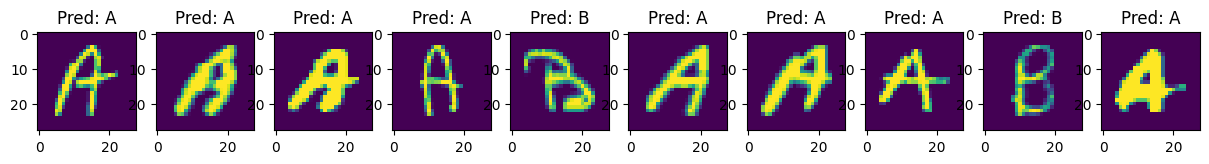

In [61]:
from sklearn.ensemble import RandomForestClassifier
RandomForest_Model =RandomForestClassifier()
RandomForest_Model.fit(X_train, y_train) 
# Make predictions on the test set
y_pred = RandomForest_Model.predict(X_test)

# Convert back the encoded labels to original alphabet labels
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Visualize a sample of test images with their predicted labels
num_samples = 10
fig, axs = plt.subplots(1, num_samples, figsize=(15, 2))

for i in range(num_samples):
    img = X_test[i].reshape(28, 28)  # Resize the image to its original dimensions for visualization
    axs[i].imshow(img, cmap='viridis') 
    axs[i].set_title(f"Pred: {y_pred_labels[i]}")

plt.show() 

### KNN Classifier

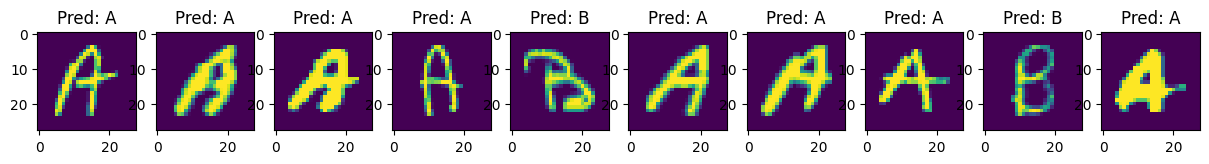

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn_Model=KNeighborsClassifier()
knn_Model.fit(X_train,y_train) 

# Make predictions on the test set
y_pred = knn_Model.predict(X_test)

# Convert back the encoded labels to original alphabet labels
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Visualize a sample of test images with their predicted labels
num_samples = 10
fig, axs = plt.subplots(1, num_samples, figsize=(15, 2))

for i in range(num_samples):
    img = X_test[i].reshape(28, 28)  # Resize the image to its original dimensions for visualization
    axs[i].imshow(img, cmap='viridis')
    axs[i].set_title(f"Pred: {y_pred_labels[i]}")

plt.show() 